In [1]:
from matplotlib import cm 
import gzip
import matplotlib.pyplot as plt
import csv
import numpy as np 
import glob 
import json
import os
import pandas as pd
import seaborn as sns
#import infosys.utils as utils 
from collections import defaultdict
cmap = cm.get_cmap('inferno', 10)


In [3]:
#sorted(list(np.arange(.01, .105, .01))+list(np.arange(.2, .6, .1)))

In [4]:
#len(sorted(list(np.arange(.0, .105, .01))+list(np.arange(.2, .6, .1))))

In [5]:
# load all data and arrange in dataframe

In [19]:
result_dir = 'results/07112022_friction_vary_friction_and_learning_6_runs'
verbose_dir = 'verbose/07112022_friction_vary_friction_and_learning_6_runs'

In [20]:
# look at single results file
data = json.load(open(os.path.join(result_dir,'mu_fr_0.1-learn_fr_0.2.json')))
df = pd.DataFrame.from_dict(data, orient='columns')
df

,mu_friction,learning_friction,targeting_criterion,beta,gamma,trackmeme,verbose,epsilon,mu,phi,alpha,theta,pass_friction,human_network,graph_gml,mode,quality,diversity,discriminative_pow
0,0.1,0.2,None,0,0,True,False,0.0001,0.5,1,15,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,data/infosys_network.gml,igraph,0.370638,5.029635,"[0.7829946223410684, 0.0]"
1,0.1,0.2,None,0,0,True,False,0.0001,0.5,1,15,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,data/infosys_network.gml,igraph,0.323688,4.864045,"[0.7846183346841105, 0.0]"
2,0.1,0.2,None,0,0,True,False,0.0001,0.5,1,15,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,data/infosys_network.gml,igraph,0.377627,4.572137,"[0.7866205612299895, 0.0]"
3,0.1,0.2,None,0,0,True,False,0.0001,0.5,1,15,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,data/infosys_network.gml,igraph,0.378246,4.931846,"[0.7833981340261287, 0.0]"
4,0.1,0.2,None,0,0,True,False,0.0001,0.5,1,15,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,data/infosys_network.gml,igraph,0.356402,5.064956,"[0.7739963851053722, 0.0]"
5,0.1,0.2,None,0,0,True,False,0.0001,0.5,1,15,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,data/infosys_network.gml,igraph,0.297686,5.130182,"[0.7707487176552703, 0.0]"


In [21]:
filenames = glob.glob(os.path.join(result_dir,'*json*')) 
len(filenames)

157

In [22]:
dfs = [] # an empty list to store the data frames
for file in filenames:
    data = pd.read_json(file, orient='columns') # read data frame from json file
    dfs.append(data) # append the data frame to the list

temp = pd.concat(dfs, ignore_index=True) # concatenate all the data frames in the list.

In [23]:
temp.head()
#data = pd.read_json('results/25102022_friction_vary_friction_and_learning_2_runs/mu_fr_0.025-learn_fr_0.03.json', orient='columns')

,mu_friction,learning_friction,targeting_criterion,beta,gamma,trackmeme,verbose,epsilon,mu,phi,alpha,theta,pass_friction,human_network,graph_gml,mode,quality,diversity,discriminative_pow
0,0.2,0.7,NaN,0,0,True,False,0.0001,0.5,1,15,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,data/infosys_network.gml,igraph,0.395094,4.884029,"[0.806707350984151, 0.0]"
1,0.2,0.7,NaN,0,0,True,False,0.0001,0.5,1,15,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,data/infosys_network.gml,igraph,0.393311,4.840981,"[0.812084322554919, 0.0]"
2,0.2,0.7,NaN,0,0,True,False,0.0001,0.5,1,15,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,data/infosys_network.gml,igraph,0.430681,4.885677,"[0.818656795252504, 0.0]"
3,0.2,0.7,NaN,0,0,True,False,0.0001,0.5,1,15,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,data/infosys_network.gml,igraph,0.376030,5.326571,"[0.808515061084846, 0.0]"
4,0.2,0.7,NaN,0,0,True,False,0.0001,0.5,1,15,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,data/infosys_network.gml,igraph,0.433712,5.035574,"[0.8087321968180201, 0.0]"


In [24]:
# make discriminative_pow column two columns
temp[['dicriminative_pow_tau','dicriminative_pow_pval']] = pd.DataFrame(temp.discriminative_pow.tolist(), index= temp.index)

In [26]:
temp.head()

,mu_friction,learning_friction,targeting_criterion,beta,gamma,trackmeme,verbose,epsilon,mu,phi,...,theta,pass_friction,human_network,graph_gml,mode,quality,diversity,discriminative_pow,dicriminative_pow_tau,dicriminative_pow_pval
0,0.2,0.7,NaN,0,0,True,False,0.0001,0.5,1,...,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,data/infosys_network.gml,igraph,0.395094,4.884029,"[0.806707350984151, 0.0]",0.806707,0.0
1,0.2,0.7,NaN,0,0,True,False,0.0001,0.5,1,...,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,data/infosys_network.gml,igraph,0.393311,4.840981,"[0.812084322554919, 0.0]",0.812084,0.0
2,0.2,0.7,NaN,0,0,True,False,0.0001,0.5,1,...,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,data/infosys_network.gml,igraph,0.430681,4.885677,"[0.818656795252504, 0.0]",0.818657,0.0
3,0.2,0.7,NaN,0,0,True,False,0.0001,0.5,1,...,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,data/infosys_network.gml,igraph,0.376030,5.326571,"[0.808515061084846, 0.0]",0.808515,0.0
4,0.2,0.7,NaN,0,0,True,False,0.0001,0.5,1,...,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,data/infosys_network.gml,igraph,0.433712,5.035574,"[0.8087321968180201, 0.0]",0.808732,0.0


In [27]:
# Make quality table
qual_agg = temp.groupby(['mu_friction', 'learning_friction'])['quality'].agg(['mean', 'std']).reset_index()
# this makes hierarchical index qual_agg_2 = temp.groupby(['mu_friction', 'learning_friction'])['quality'].agg(['mean', 'std'])

In [28]:
# Make diversity table
div_agg = temp.groupby(['mu_friction', 'learning_friction'])['diversity'].agg(['mean', 'std']).reset_index()

In [29]:
# Make disrcriminative power table
dp_agg = temp.groupby(['mu_friction', 'learning_friction'])['dicriminative_pow_tau'].agg(['mean', 'std']).reset_index()


In [30]:
dp_agg_pval = temp.groupby(['mu_friction', 'learning_friction'])['dicriminative_pow_pval'].agg(['mean', 'std']).reset_index()

In [41]:
def frictionplot(no_learn, learn, learn_1, learn_50, learn_100, ylabel, savename):
    fig, ax = plt.subplots()
    clrs = sns.color_palette("husl", 10)
    with sns.axes_style("darkgrid"):

        meanst = no_learn['mean']
        sdt = no_learn['std']
    
        meanst_learn_10 = learn_10['mean']
        sdt_learn_10 = learn_10['std']
        
        meanst_learn_1 = learn_1['mean']
        sdt_learn_1 = learn_1['std']
        
        meanst_learn_50 = learn_50['mean']
        sdt_learn_50 = learn_50['std']

        meanst_learn_100 = learn_100['mean']
        sdt_learn_100 = learn_100['std']
    
        ax.plot(pd.unique(no_learn['mu_friction']), meanst,label = 'No Learning', c=clrs[7], linestyle='-')
        ax.fill_between(pd.unique(no_learn['mu_friction']), meanst-sdt, meanst+sdt ,alpha=0.3, facecolor=clrs[7])
    
        ax.plot(pd.unique(learn_1['mu_friction']), meanst_learn_1,  label = 'Learning, 1%',c=clrs[1], linestyle='dashdot')
        ax.fill_between(pd.unique(learn_1['mu_friction']), meanst_learn_1-sdt_learn_1, meanst_learn_1+sdt_learn_1 ,alpha=0.3, facecolor=clrs[1])
    
        ax.plot(pd.unique(learn_10['mu_friction']), meanst_learn_10,  label = 'Learning, 10%',c=clrs[0], linestyle='--')
        ax.fill_between(pd.unique(learn_10['mu_friction']), meanst_learn_10-sdt_learn_10, meanst_learn_10+sdt_learn_10 ,alpha=0.3, facecolor=clrs[0])
   
        ax.plot(pd.unique(learn_50['mu_friction']), meanst_learn_50,  label = 'Learning, 50%',c=clrs[3], linestyle='dotted')
        ax.fill_between(pd.unique(learn_50['mu_friction']), meanst_learn_50-sdt_learn_50, meanst_learn_50+sdt_learn_50 ,alpha=0.3, facecolor=clrs[3])

        ax.plot(pd.unique(learn_100['mu_friction']), meanst_learn_100,  label = 'Learning, 100%',c=clrs[8], dashes=[3,6,3,6,3,18])
        ax.fill_between(pd.unique(learn_100['mu_friction']), meanst_learn_100-sdt_learn_100, meanst_learn_100+sdt_learn_100 ,alpha=0.3, facecolor=clrs[8])

        #ax.set_xlim([0, .5])

        ax.legend()
        #ax.set_yscale('log')
        plt.xlabel("Friction")
        fig.set_tight_layout(True)
        plt.ylabel(ylabel)
        plt.savefig(savename)  

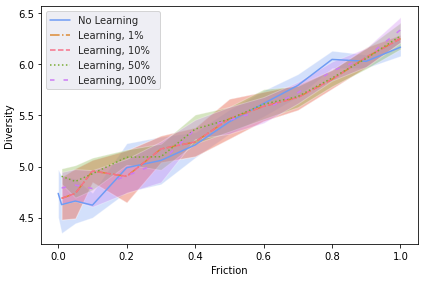

In [42]:
no_learn = div_agg.loc[div_agg['learning_friction'] == 0.0] 

learn_10 = div_agg.loc[(div_agg['learning_friction'] > 0.098) & (div_agg['learning_friction'] < 0.13)]

learn_1 = div_agg.loc[(div_agg['learning_friction'] > 0.009) & (div_agg['learning_friction'] < 0.013)]

learn_50 = div_agg.loc[(div_agg['learning_friction'] > 0.49) & (div_agg['learning_friction'] < 0.55)]

learn_100 = div_agg.loc[(div_agg['learning_friction'] > 0.98)]

ylabel = 'Diversity'
savename = 'line_plot_diversity_and_learning.pdf'

frictionplot(no_learn, learn_1, learn_10, learn_50, learn_100, ylabel, savename)



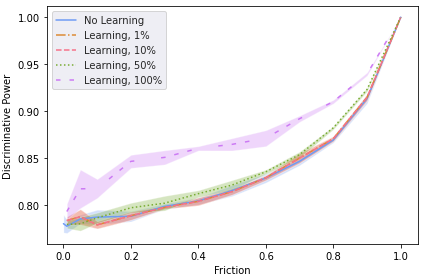

In [43]:
no_learn = dp_agg.loc[dp_agg['learning_friction'] == 0.0] 

learn_10 = dp_agg.loc[(dp_agg['learning_friction'] > 0.098) & (dp_agg['learning_friction'] < 0.13)]

learn_1 = dp_agg.loc[(dp_agg['learning_friction'] > 0.009) & (dp_agg['learning_friction'] < 0.013)]

learn_50 = dp_agg.loc[(dp_agg['learning_friction'] > 0.49) & (dp_agg['learning_friction'] < 0.55)]

learn_100 = dp_agg.loc[(dp_agg['learning_friction'] > 0.98)]

ylabel = 'Discriminative Power'
savename = 'line_plot_discriminativepower_and_learning.pdf'

frictionplot(no_learn, learn_1, learn_10, learn_50, learn_100, ylabel, savename)



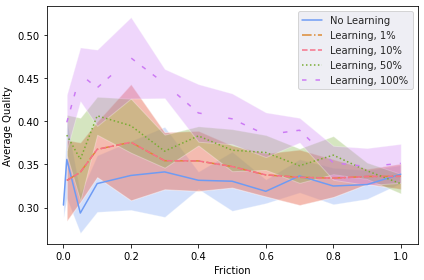

In [44]:
no_learn = qual_agg.loc[qual_agg['learning_friction'] == 0.0] 

learn_10 = qual_agg.loc[(qual_agg['learning_friction'] > 0.098) & (qual_agg['learning_friction'] < 0.13)]

learn_1 = qual_agg.loc[(qual_agg['learning_friction'] > 0.009) & (qual_agg['learning_friction'] < 0.013)]

learn_50 = qual_agg.loc[(qual_agg['learning_friction'] > 0.49) & (qual_agg['learning_friction'] < 0.55)]

learn_100 = qual_agg.loc[(qual_agg['learning_friction'] > 0.98)]

ylabel = 'Average Quality'
savename = 'line_plot_quality_and_learning.pdf'

frictionplot(no_learn, learn_1, learn_10, learn_50, learn_100, ylabel, savename)


In [45]:
fric_00 = os.path.join(verbose_dir, 'mu_fr_0.0-learn_fr_0.0.json.gz')
fric_01 = os.path.join(verbose_dir, 'mu_fr_0.01-learn_fr_0.json.gz')
fric_10 = os.path.join(verbose_dir, 'mu_fr_0.1-learn_fr_0.json.gz')
fric_50 = os.path.join(verbose_dir, 'mu_fr_0.5000000000000001-learn_fr_0.json.gz')
fric_100 = os.path.join(verbose_dir, 'mu_fr_1.0000000000000002-learn_fr_0.json.gz')

fric_10_learn_01 = os.path.join(verbose_dir, 'mu_fr_0.1-learn_fr_0.01.json.gz')
fric_10_learn_10 = os.path.join(verbose_dir, 'mu_fr_0.1-learn_fr_0.1.json.gz')
fric_10_learn_50 = os.path.join(verbose_dir, 'mu_fr_0.1-learn_fr_0.5000000000000001.json.gz')
fric_10_learn_100 = os.path.join(verbose_dir, 'mu_fr_0.1-learn_fr_1.0000000000000002.json.gz')

In [46]:
# inspect data
with gzip.open(fric_00, 'r') as fin:        # 4. gzip
    json_bytes = fin.read()                      # 3. bytes (i.e. UTF-8)

json_str = json_bytes.decode('utf-8')            # 2. string (i.e. JSON)
data = json.loads(json_str)                      # 1. data

data.keys()

dict_keys(['mu_friction', 'learning_friction', 'targeting_criterion', 'beta', 'gamma', 'trackmeme', 'verbose', 'epsilon', 'mu', 'phi', 'alpha', 'theta', 'pass_friction', 'human_network', 'graph_gml', 'mode', 'quality', 'diversity', 'discriminative_pow', 'quality_timestep', 'all_memes', 'all_feeds', 'meme_influx', 'meme_netchange'])

In [47]:
def qualityplot(qual, legendtext, filename):
    fig, ax = plt.subplots()
    #clrs = sns.color_palette("husl", 10)
    with sns.axes_style("darkgrid"):
        for x in range(0, len(data['quality_timestep'])):
            ax.plot(list(range(0,len(qual[x]),1)), qual[x])#,label = legendtext)#, c=clrs[7], linestyle='-')
            # ax.set_yscale('log')
            plt.xlabel("Timestep")
            fig.set_tight_layout(True)
            plt.ylabel("Quality")
    ax.set_title(legendtext)
    plt.savefig(filename)  
    plt.show()


In [56]:
def getgzip(file):
    with gzip.open(file, 'r') as fin:        # 4. gzip
        json_bytes = fin.read()                      # 3. bytes (i.e. UTF-8)

        json_str = json_bytes.decode('utf-8')            # 2. string (i.e. JSON)
        data = json.loads(json_str)                      # 1. data
        qual = data['quality_timestep']
    return(qual)


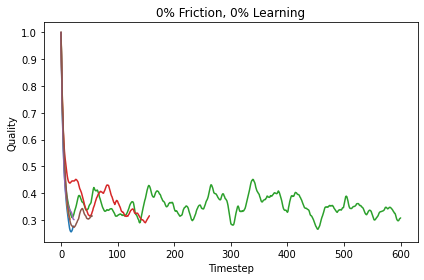

In [66]:
qual = getgzip(fric_00)
qualityplot(qual, '0% Friction, 0% Learning', 'quality_convergence_nofric.pdf')

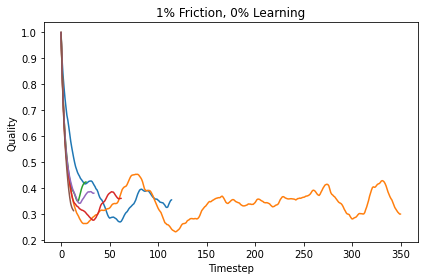

In [67]:
qual = getgzip(fric_01)
qualityplot(qual, '1% Friction, 0% Learning', 'quality_convergence_fric01.pdf')

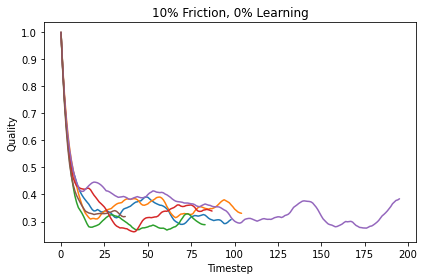

In [68]:
qual = getgzip(fric_10)
qualityplot(qual, '10% Friction, 0% Learning', 'quality_convergence_fric10.pdf')

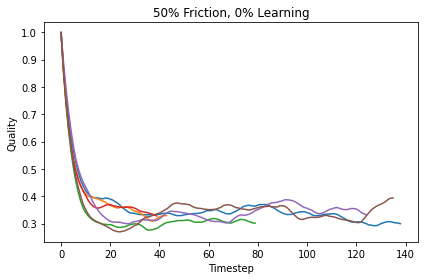

In [69]:
qual = getgzip(fric_50)
qualityplot(qual, '50% Friction, 0% Learning', 'quality_convergence_fric50.pdf')

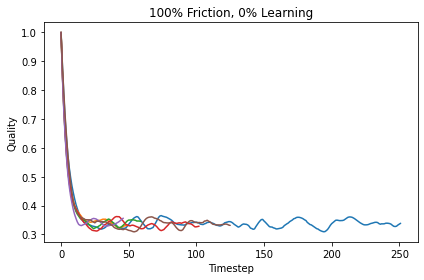

In [70]:
qual = getgzip(fric_100)
qualityplot(qual, '100% Friction, 0% Learning', 'quality_convergence_fric100.pdf')

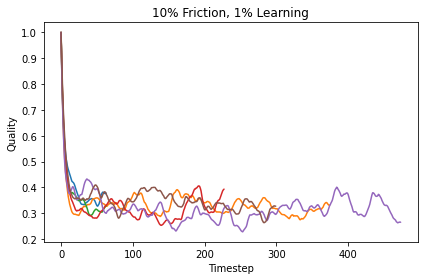

In [71]:
qual = getgzip(fric_10_learn_01)
qualityplot(qual, '10% Friction, 1% Learning', 'quality_convergence_fric10_learn1.pdf')

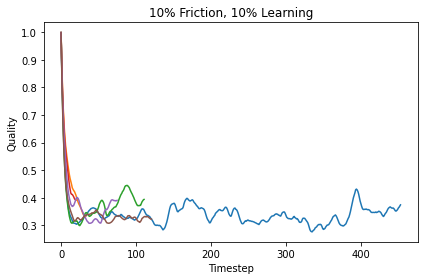

In [72]:
qual = getgzip(fric_10_learn_10)
qualityplot(qual, '10% Friction, 10% Learning', 'quality_convergence_fric10_learn10.pdf')

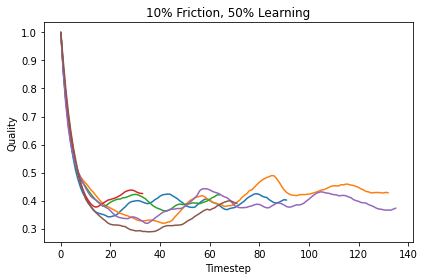

In [73]:
qual = getgzip(fric_10_learn_50)
qualityplot(qual, '10% Friction, 50% Learning', 'quality_convergence_fric10_learn50.pdf')

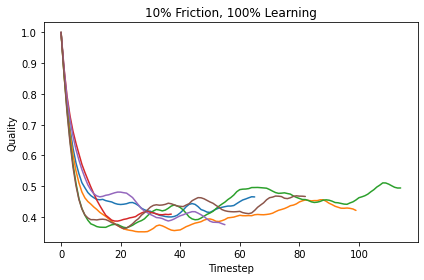

In [74]:
qual = getgzip(fric_10_learn_100)
qualityplot(qual, '10% Friction, 100% Learning', 'quality_convergence_fric10_learn100.pdf')

In [17]:
print(json.dumps(data, indent = 4)) # structured way to look at it, takes long for big files (20ish runs, okay for 2ish)

Notes regarding the Kendall-Tau measure

In [ ]:
import scipy.stats as stats

In [ ]:
def measure_kendall_tau(self):
        # calculate discriminative power of system
        # Call only after self._return_all_meme_info() is called

        # The below does not account for ties:

        quality_ranked = sorted(self.meme_dict, key=lambda m: m['quality'])
        for ith, elem in enumerate(quality_ranked):
            elem.update({'qual_th':ith})

        share_ranked = sorted(quality_ranked, key=lambda m: m['human_shares'])
        for ith, elem in enumerate(share_ranked):
            elem.update({'share_th':ith})

        idx_ranked = sorted(share_ranked, key=lambda m: m['id'])
        ranking1 = [meme['qual_th'] for meme in idx_ranked] # Laura: position returned to ranking1
        ranking2 = [meme['share_th'] for meme in idx_ranked]
        
        tau, p_value = utils.kendall_tau(ranking1, ranking2)
        return tau, p_value

In [126]:
meme_dict = [{'id': 1, 'quality': '0.9', 'human_shares': 10}, {'id': 2, 'quality': '0.7', 'human_shares': 15}, {'id': 3, 'quality': '0.4', 'human_shares': 100}]

In [160]:
def measure_kendall_tau(meme_dict):
    # calculate discriminative power of system
    # Call only after self._return_all_meme_info() is called
    # Laura: newly written function to account for ties when producing ranking1 and ranking2
    qualities = [meme['quality'] for meme in meme_dict]
    unique_qualities = set(qualities) 

    ranks = {key: rank for rank, key in enumerate(sorted(unique_qualities, reverse=True), 1)}

    for meme in meme_dict:
        meme_quality = meme['quality']
        qual_th = ranks[meme_quality]
        meme.update({'qual_th':qual_th})


    shares = [meme['human_shares'] for meme in meme_dict]
    unique_shares = set(shares)

    ranks = {key: rank for rank, key in enumerate(sorted(unique_shares, reverse=True), 1)}

    for meme in meme_dict:
        meme_shares = meme['human_shares']
        share_th = ranks[meme_shares]
        meme.update({'share_th': share_th})


    idx_ranked = sorted(meme_dict, key=lambda m: m['id'])
    ranking1 = [meme['qual_th'] for meme in idx_ranked] 
    ranking2 = [meme['share_th'] for meme in idx_ranked]

    print(ranking1, ranking2)
    
    tau, p_value = stats.kendalltau(ranking1, ranking2) 
    # Be aware: If one ranking comprises only ties, then nan is returned.
    # from scipy function source code: https://github.com/scipy/scipy/blob/v1.9.3/scipy/stats/_stats_py.py#L5018-L5225 
    # sourcecode: if xtie == tot or ytie == tot:
        # return KendalltauResult(np.nan, np.nan)
        # Note that tot = con + dis + (xtie - ntie) + (ytie - ntie) + ntie
        #               = con + dis + xtie + ytie - ntie
    # end sourcode
    return tau, p_value # in [-1,1]

In [161]:
measure_kendall_tau(meme_dict)

[1, 2, 3] [3, 2, 1]


(-1.0, 0.3333333333333333)

Comaprison Kendall-Rank coefficient vs Spearman-Rank coefficient
Result: If once ranking is constant (all ties), both return nan.

In [169]:
a = [1,1,2,1,1,1]
b = [6,5,3,1,2,1]
spearman, p_value = stats.spearmanr(a, b)
print(spearman, p_value)

0.13284223283101432 0.8019087881019875


In [170]:
a = [1,1,2,1,1,1]
b = [6,5,3,1,2,1]
tau, p_value = stats.kendalltau(a, b, variant = 'c')
print(tau, p_value)

0.1111111111111111 0.7664327164541457


In [26]:
check(quality,fitness)

False

In [35]:
exponent = 1 + 1 #phi=1

u = random.random() # sample from between 0 to 1
fitness = 1 - (1 - u)**(1 / exponent)
# quality = fitness
w = random.random()

quality = 1 - (1 - w)**(1 / exponent)

if check(quality,fitness) == False:
    if quality > fitness:
        quality = fitness + truncation_interval
        if quality > 1:
            quality = 1
    if quality < fitness:
        quality = fitness - truncation_interval
        if quality < 0:
            quality = 0
            
print(quality, fitness)

0.2943646372909582 0.7986335813106251


In [41]:
def check(fitness,quality, truncation_interval):
    if (fitness - truncation_interval) <= quality <= (fitness + truncation_interval):
        return True
    return False
check(fitness,quality, truncation_interval) == False

False

In [38]:
truncation_interval = 0.2
if check(quality,fitness) == False:
    if quality > fitness:
        quality = fitness + truncation_interval
        if quality > 1:
            quality = 1
    if quality < fitness:
        quality = fitness - truncation_interval
        if quality < 0:
            quality = 0
print(quality,fitness)

0.5986335813106252 0.7986335813106251
